## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

In [2]:
import pandas as pd

# 读取数据集
data = pd.read_csv('data\github_bot_processed_data.csv')

# 设置显示选项：显示更多行和列
pd.set_option('display.max_rows', 100)  # 显示最多 100 行
pd.set_option('display.max_columns', 50)  # 显示最多 50 列

# 显示前几行数据
print(data.head())


   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。

In [3]:
# 查看前几行数据
print(data.head())

# 查看数据的摘要信息
print(data.info())

# 获取数据的描述性统计信息
print(data.describe())


   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [12]:
# 1. 格式化日期列（将 'created_at' 和 'updated_at' 转换为日期格式）
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# 查看日期格式化后的结果
print("Date Columns formatted:")
print(data[['created_at', 'updated_at']].head())

# 2. 格式化百分比列（将 'followers' 和 'following' 列转换为百分比格式）
# 计算总人数（例如，total = followers + following），然后格式化为百分比
data['followers'] = data['followers'].apply(lambda x: f"{x:,} Followers")
data['following'] = data['following'].apply(lambda x: f"{x:,} Following")

# 查看百分比格式化后的结果
print("\nPercentage formatted columns:")
print(data[['followers', 'following']].head())


Date Columns formatted:
                 created_at                updated_at
0 2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00
1 2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00
2 2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00
3 2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00
4 2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00

Percentage formatted columns:
         followers      following
0      5 Followers    1 Following
1      9 Followers    6 Following
2  1,212 Followers  221 Following
3     84 Followers    2 Following
4      6 Followers    2 Following


In [14]:
import pandas as pd

# 读取数据集
data = pd.read_csv('data/github_bot_processed_data.csv')

# 1. 将 'public_repos' 和 'public_gists' 列转换为数值类型，无法转换的将变为 NaN
data['public_repos'] = pd.to_numeric(data['public_repos'], errors='coerce')
data['public_gists'] = pd.to_numeric(data['public_gists'], errors='coerce')

# 2. 填充 NaN 值为 0（或者可以根据实际情况选择其他值）
data['public_repos'].fillna(0, inplace=True)
data['public_gists'].fillna(0, inplace=True)

# 3. 格式化货币列
data['public_repos'] = data['public_repos'].apply(lambda x: f"${x:,.2f}")
data['public_gists'] = data['public_gists'].apply(lambda x: f"${x:,.2f}")

# 查看货币格式化后的结果
print("\nCurrency formatted columns:")
print(data[['public_repos', 'public_gists']].head())



Currency formatted columns:
  public_repos public_gists
0       $26.00        $1.00
1       $30.00        $3.00
2      $103.00       $49.00
3       $49.00        $0.00
4       $11.00        $1.00


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_20584\3901438345.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['public_repos'].fillna(0, inplace=True)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_20584\3901438345.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [16]:
import pandas as pd
import numpy as np

# 读取数据集
data = pd.read_csv('data/github_bot_processed_data.csv')

# 1. 将 'public_repos' 和 'public_gists' 列转换为数值类型，无法转换的将变为 NaN
data['public_repos'] = pd.to_numeric(data['public_repos'], errors='coerce')
data['public_gists'] = pd.to_numeric(data['public_gists'], errors='coerce')

# 填充 NaN 值为 0
data['public_repos'] = data['public_repos'].fillna(0)
data['public_gists'] = data['public_gists'].fillna(0)

# 确保数据为正数（加1避免对数变换时出现0的情况）
data['public_repos_log'] = np.log(data['public_repos'] + 1)  # 对数变换
data['public_gists_log'] = np.log(data['public_gists'] + 1)  # 对数变换
data['followers_log'] = np.log(data['followers'] + 1)  # 对数变换
data['following_log'] = np.log(data['following'] + 1)  # 对数变换

# 查看变换后的数据
print("\nLog transformed columns:")
print(data[['public_repos', 'public_repos_log', 
            'public_gists', 'public_gists_log', 
            'followers', 'followers_log', 
            'following', 'following_log']].head())



Log transformed columns:
   public_repos  public_repos_log  public_gists  public_gists_log  followers  \
0            26          3.295837             1          0.693147          5   
1            30          3.433987             3          1.386294          9   
2           103          4.644391            49          3.912023       1212   
3            49          3.912023             0          0.000000         84   
4            11          2.484907             1          0.693147          6   

   followers_log  following  following_log  
0       1.791759          1       0.693147  
1       2.302585          6       1.945910  
2       7.100852        221       5.402677  
3       4.442651          2       1.098612  
4       1.945910          2       1.098612  


对数变换是数据预处理中常见的一种方法，特别适用于右偏分布的数据（即数据分布中有一些极大值，造成数据的偏斜）。对数变换可以帮助将数据压缩，使其更加接近正态分布，从而便于建模和分析。

5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_20584\3775325449.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Blues_d')


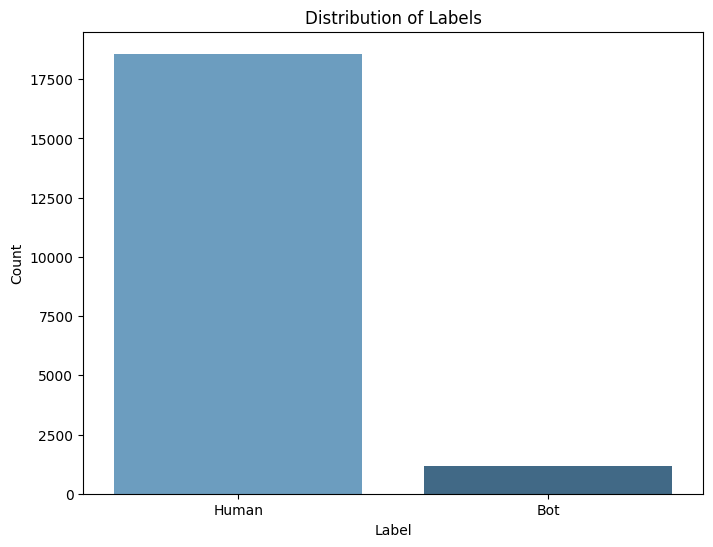

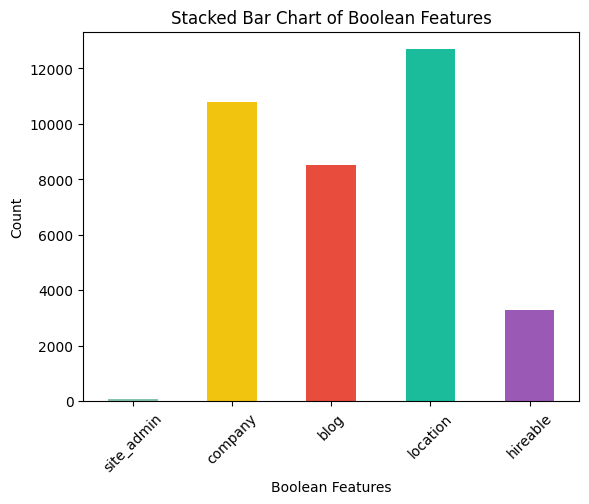

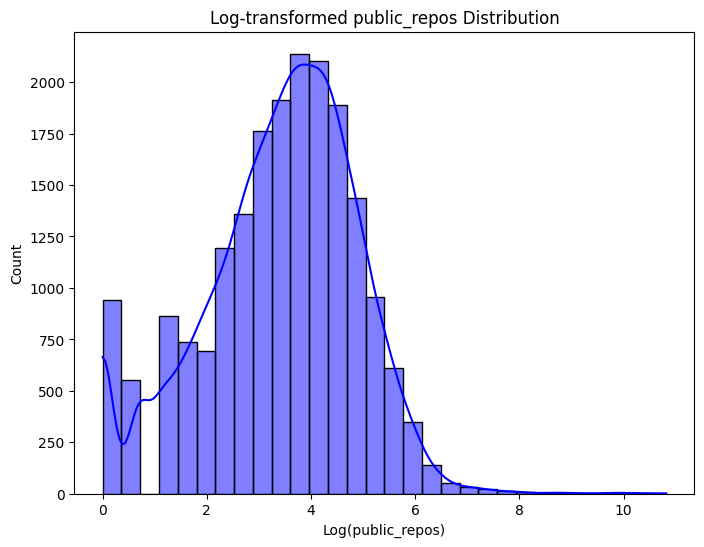

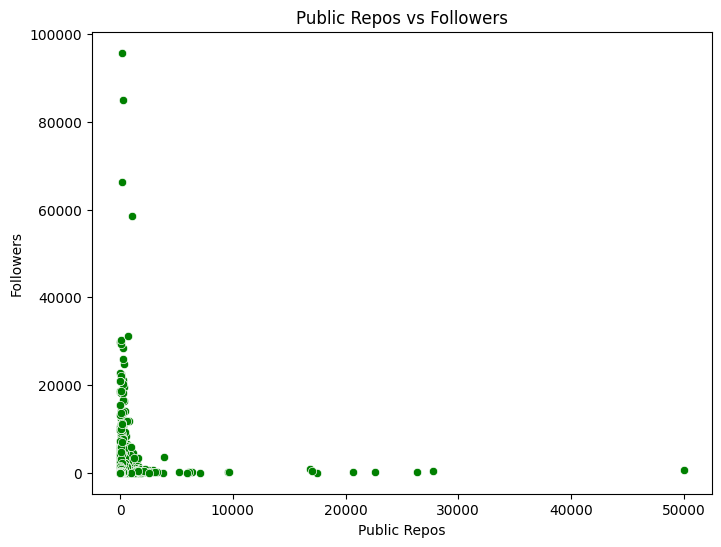

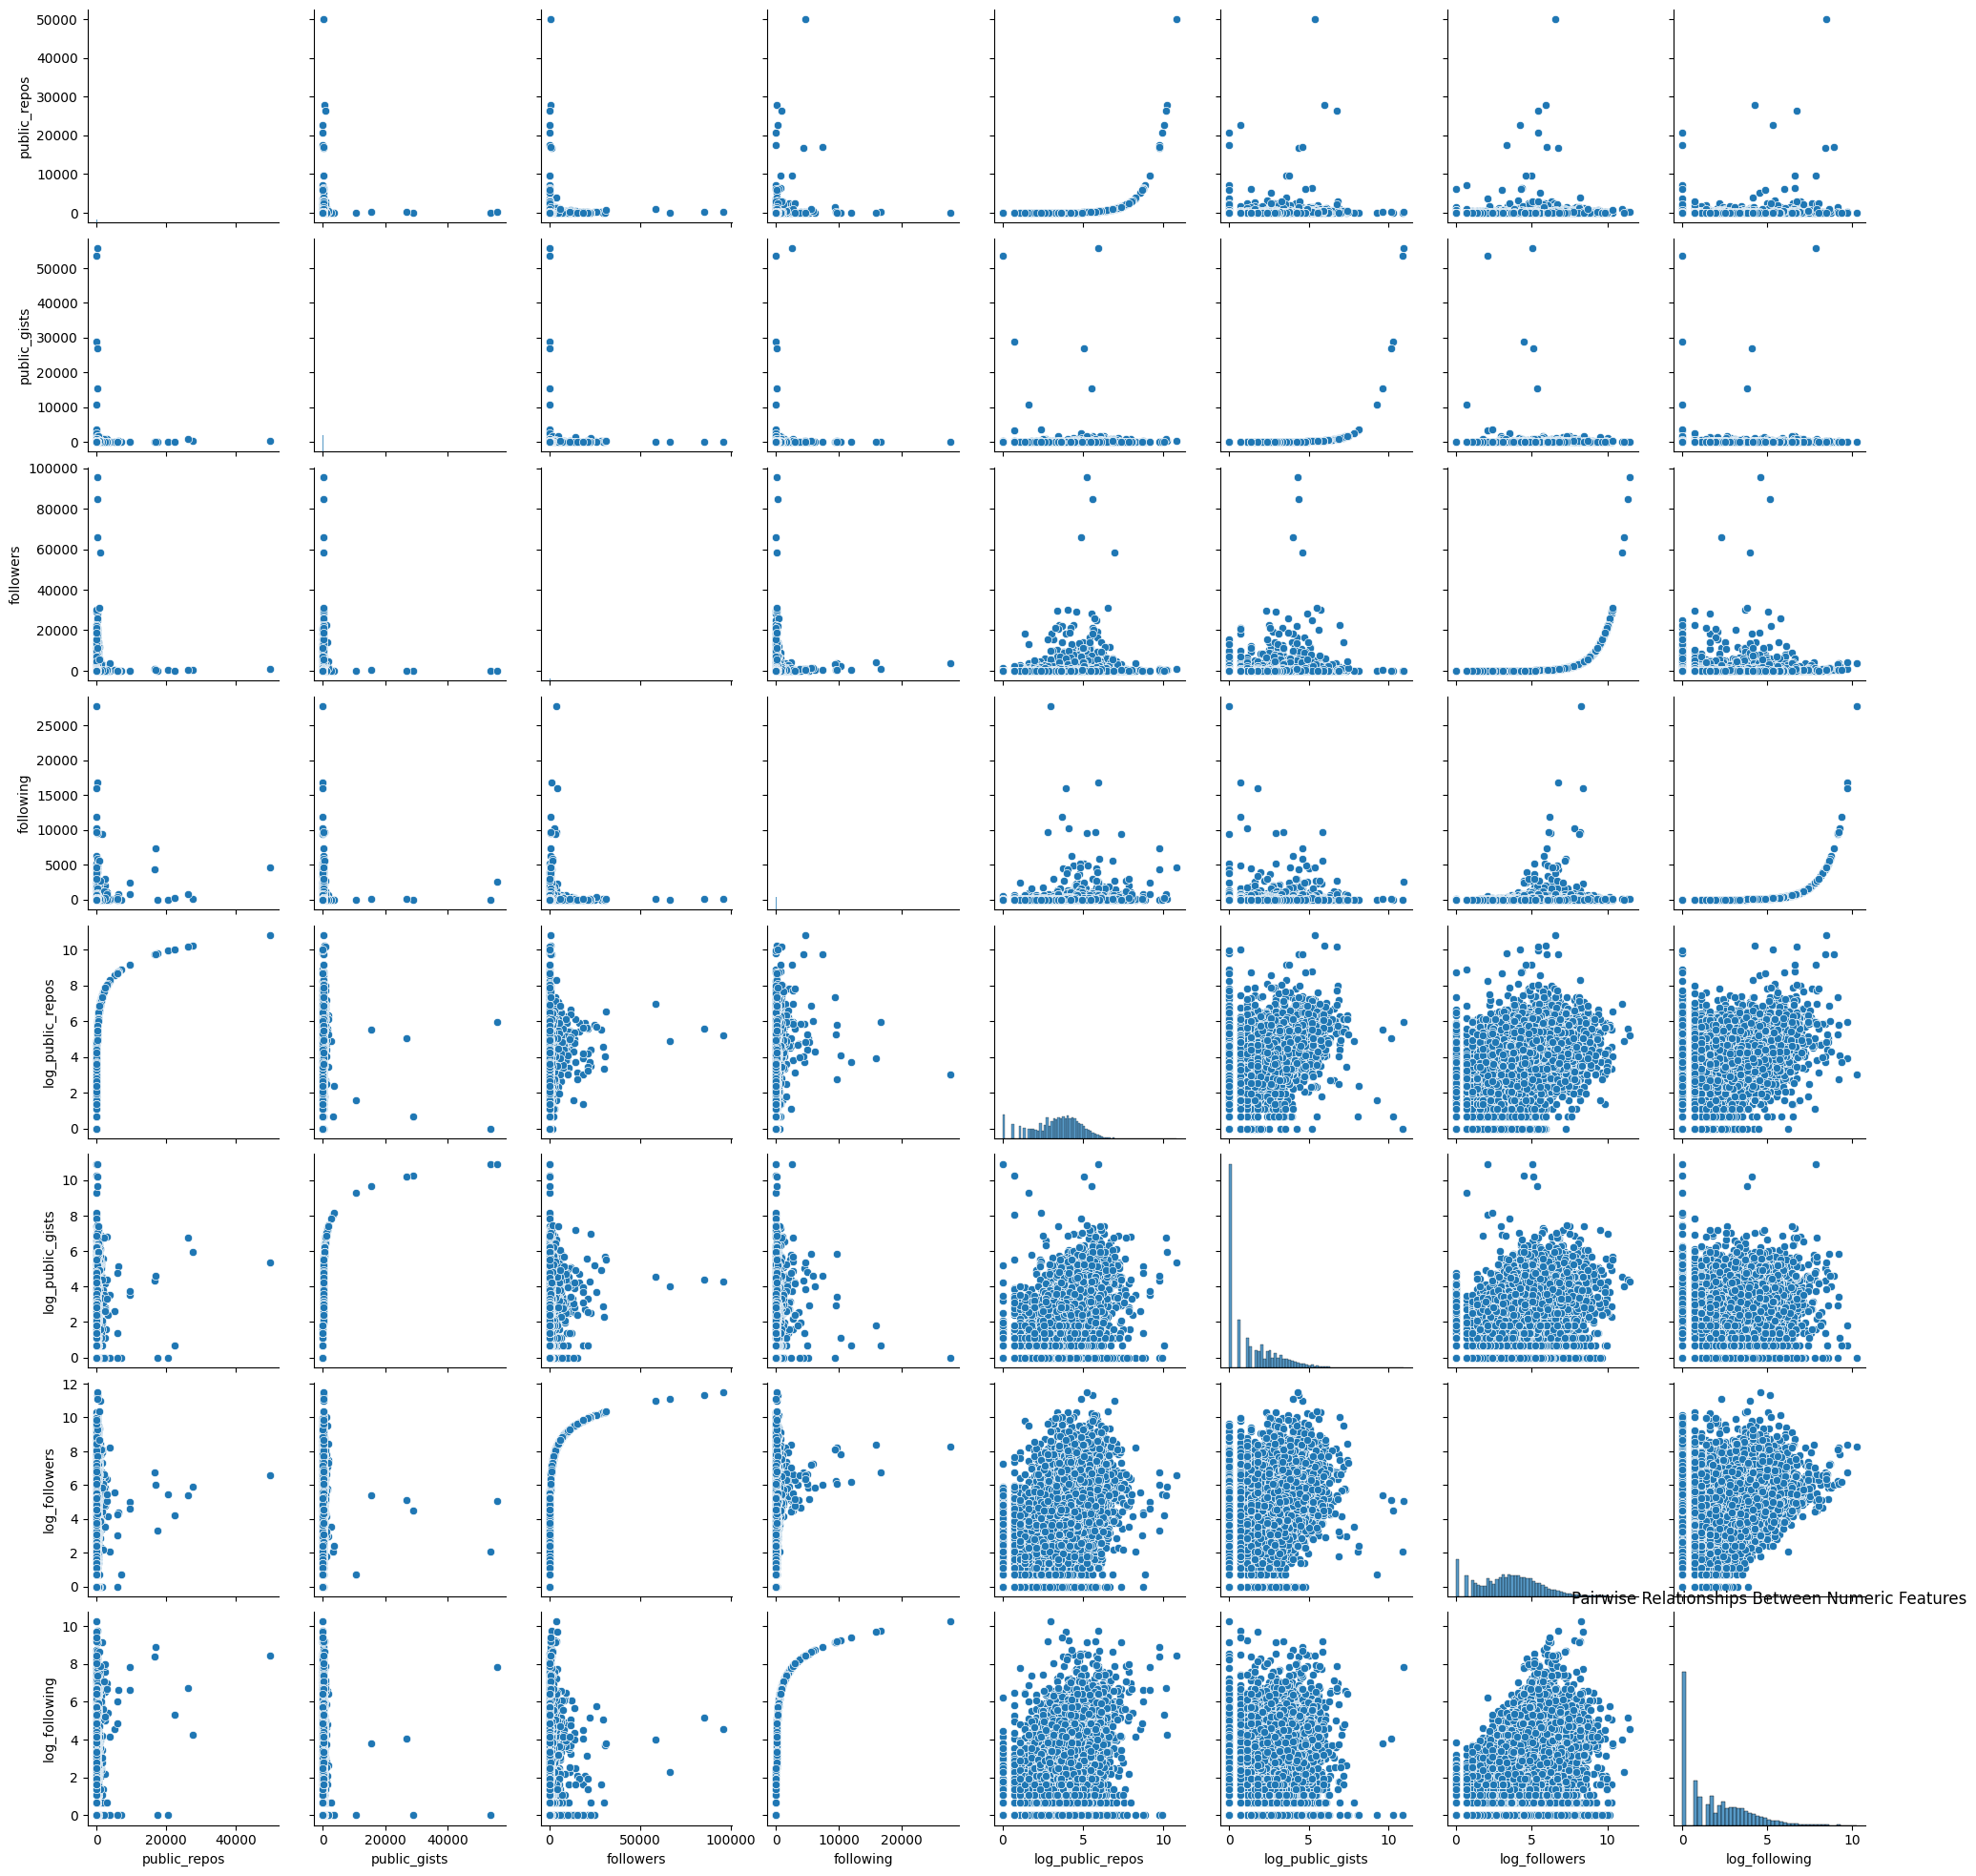

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 读取数据集
data = pd.read_csv('data/github_bot_processed_data.csv')

# 确保数据为数值类型
data['public_repos'] = pd.to_numeric(data['public_repos'], errors='coerce')
data['public_gists'] = pd.to_numeric(data['public_gists'], errors='coerce')
data['followers'] = pd.to_numeric(data['followers'], errors='coerce')
data['following'] = pd.to_numeric(data['following'], errors='coerce')

# 填充 NaN 值为 0
data['public_repos'] = data['public_repos'].fillna(0)
data['public_gists'] = data['public_gists'].fillna(0)
data['followers'] = data['followers'].fillna(0)
data['following'] = data['following'].fillna(0)

# 对数变换
data['log_public_repos'] = np.log1p(data['public_repos'])
data['log_public_gists'] = np.log1p(data['public_gists'])
data['log_followers'] = np.log1p(data['followers'])
data['log_following'] = np.log1p(data['following'])

# 1. 绘制条形图：展示 label 列的类别分布
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='Blues_d')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 2. 绘制堆积柱状图：展示多个布尔特征的分布
# 我们选择 'site_admin', 'company', 'blog' 等布尔特征
bool_features = ['site_admin', 'company', 'blog', 'location', 'hireable']
data_bool = data[bool_features]

# 创建堆积柱状图
data_bool.sum().plot(kind='bar', stacked=True, color=['#85C1AE', '#F1C40F', '#E74C3C', '#1ABC9C', '#9B59B6'])
plt.title('Stacked Bar Chart of Boolean Features')
plt.xlabel('Boolean Features')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. 绘制直方图：展示 log_public_repos 的对数变换后的数据分布
plt.figure(figsize=(8, 6))
sns.histplot(data['log_public_repos'], kde=True, color='blue', bins=30)
plt.title('Log-transformed public_repos Distribution')
plt.xlabel('Log(public_repos)')
plt.ylabel('Count')
plt.show()

# 4. 绘制散点图：展示 public_repos 与 followers 之间的关系
plt.figure(figsize=(8, 6))
sns.scatterplot(x='public_repos', y='followers', data=data, color='green')
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 5. 绘制散点矩阵：展示多个数值型特征之间的成对关系
num_features = ['public_repos', 'public_gists', 'followers', 'following', 'log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
sns.pairplot(data[num_features])
plt.title('Pairwise Relationships Between Numeric Features')
plt.show()


6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。

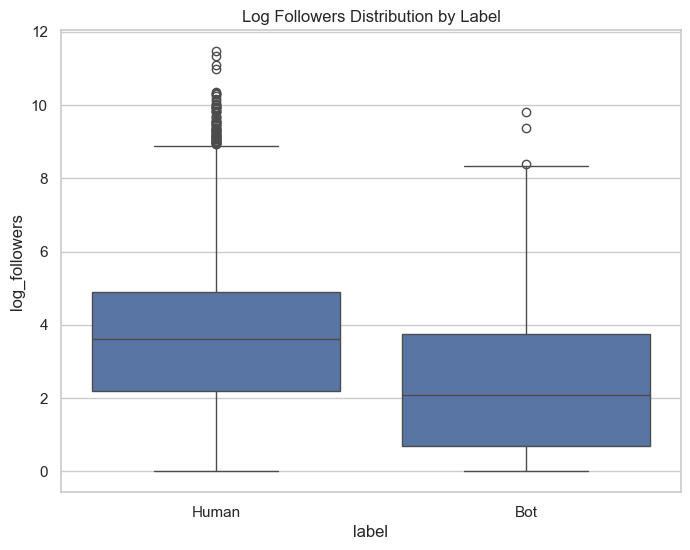

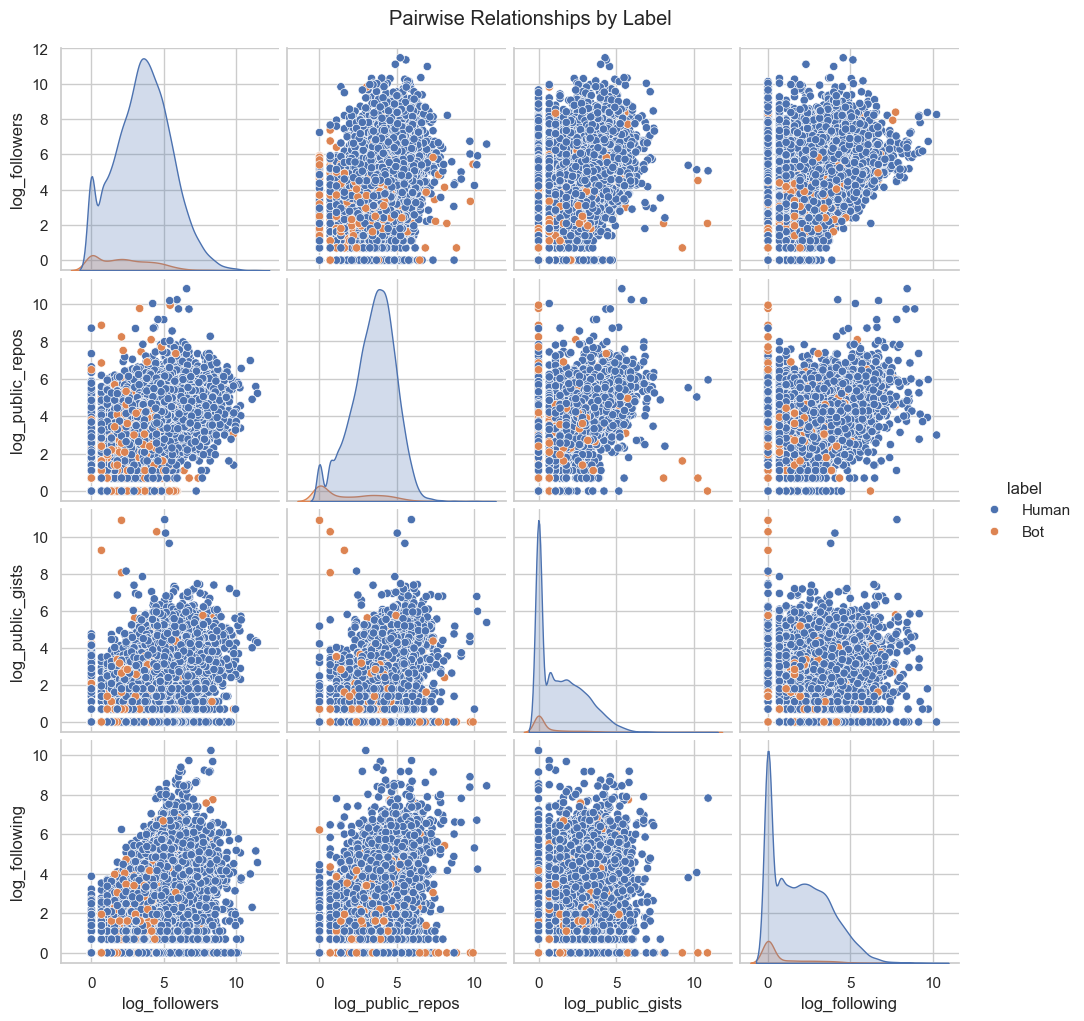

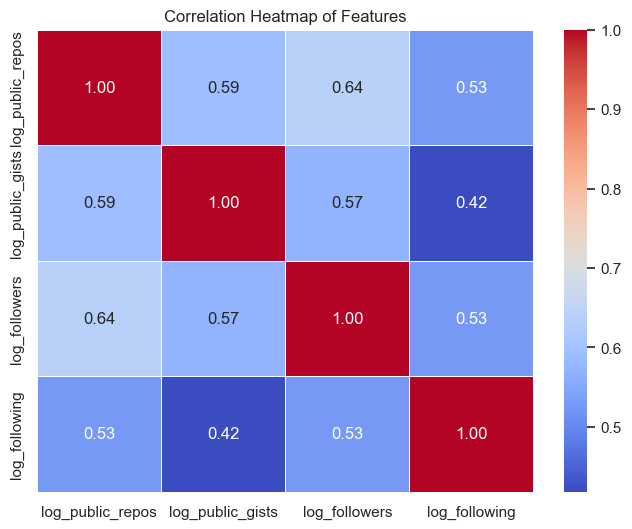

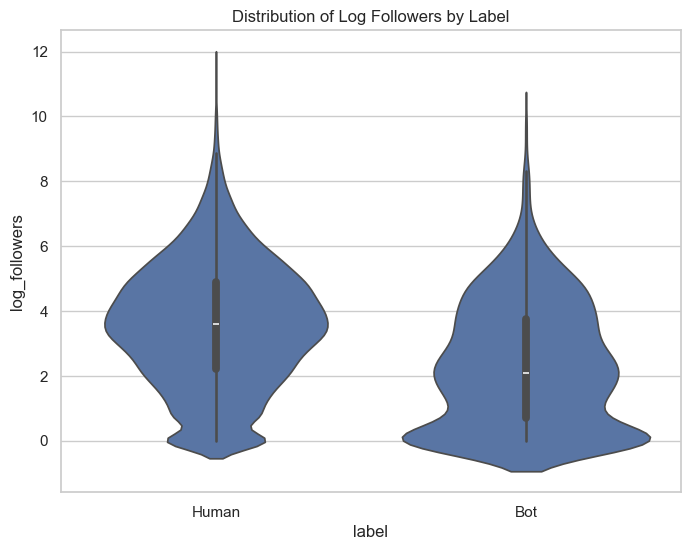

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/github_bot_processed_data.csv')

# 计算log相关的特征
import numpy as np
data['log_followers'] = np.log1p(data['followers'])
data['log_public_repos'] = np.log1p(data['public_repos'])
data['log_public_gists'] = np.log1p(data['public_gists'])
data['log_following'] = np.log1p(data['following'])

# 设置绘图风格
sns.set(style="whitegrid")

# 1. 绘制箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.title('Log Followers Distribution by Label')
plt.show()

# 2. 绘制成对图：展示不同特征之间的成对关系，并根据label分类
sns.pairplot(data, hue='label', vars=['log_followers', 'log_public_repos', 'log_public_gists', 'log_following'])
plt.suptitle('Pairwise Relationships by Label', y=1.02)
plt.show()

# 3. 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following之间的相关性
corr_matrix = data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# 4. 绘制小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(8, 6))
sns.violinplot(x='label', y='log_followers', data=data)
plt.title('Distribution of Log Followers by Label')
plt.show()


7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [7]:
import pandas as pd
from pydantic_settings import BaseSettings
from pandas_profiling import ProfileReport

# 读取数据集
data = pd.read_csv('data/github_bot_processed_data.csv')

# 创建报告
profile = ProfileReport(data, title='GitHub Bot Data Report', explorative=True)

# 保存报告为 HTML 文件
profile.to_file("github_bot_data_report.html")

# 显示报告
profile.to_notebook_iframe()


PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.10/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.10/u/import-error